In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import BatchNormalization

In [2]:
import pathlib
data_dir = pathlib.Path('/Users/alfahwun/Documents/faces')


In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

3596


In [4]:
img_height = 64
img_width = 64

In [5]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=8,
    validation_split=0.1,
    subset="both",
    seed=123,
    image_size=(img_height, img_width))


Found 3595 files belonging to 2 classes.
Using 3236 files for training.
Using 359 files for validation.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-10 10:33:45.968613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 10:33:45.968941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
class_names = train_ds.class_names
print(class_names)

['angry', 'smiling']


In [7]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [9]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(8, (2, 2), 1, activation='relu', input_shape=(img_height, img_width, 3),padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), 1, activation='relu',padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25


2023-03-10 10:34:03.226129: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2023-03-10 10:34:04.293630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - ETA: 0s - loss: 1.4940 - accuracy: 0.6931

2023-03-10 10:34:38.486286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 36s 82ms/step - loss: 1.4940 - accuracy: 0.6931 - val_loss: 0.6372 - val_accuracy: 0.6908
Epoch 2/25
405/405 [==============================] - 32s 80ms/step - loss: 0.5352 - accuracy: 0.7067 - val_loss: 0.4758 - val_accuracy: 0.6936
Epoch 3/25
405/405 [==============================] - 34s 83ms/step - loss: 0.5349 - accuracy: 0.7049 - val_loss: 1.9891 - val_accuracy: 0.5487
Epoch 4/25
405/405 [==============================] - 31s 77ms/step - loss: 0.7440 - accuracy: 0.7046 - val_loss: 1.0131 - val_accuracy: 0.6880
Epoch 5/25
405/405 [==============================] - 31s 77ms/step - loss: 0.4971 - accuracy: 0.7185 - val_loss: 0.4192 - val_accuracy: 0.8189
Epoch 6/25
405/405 [==============================] - 31s 77ms/step - loss: 0.4566 - accuracy: 0.7877 - val_loss: 0.4431 - val_accuracy: 0.8134
Epoch 7/25
405/405 [==============================] - 34s 83ms/step - loss: 0.4533 - accuracy: 0.7821 - val_loss: 0.4361 - val_accuracy: 0.8050
Epo

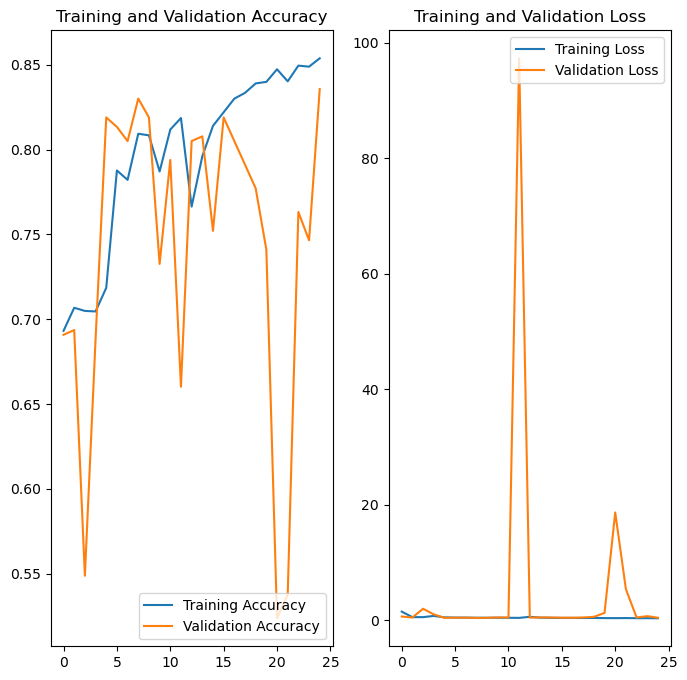

In [11]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
img = tf.keras.utils.load_img(
    "/Users/alfahwun/Downloads/Expressions/happy/ffhq_0.png", target_size=(img_height, img_width)
)
resize = tf.image.resize(img, (64,64))
yhat = model.predict(np.expand_dims(resize/255, 0))

2023-03-10 10:25:43.090390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 357ms/step


In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is smiling')
else:
    print('Predicted class is angry')

In [ ]:
import os
model.save(os.path.join('models','angrysmilingclassifier.h5'))